pj_1과 다른 점은 pd.dataframe을 사용해 data label을 추가한 점

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

working_dir = 'data'


# Google Drive 에서 Colab Default Directory
colab_default_dir = '/content/gdrive/MyDrive/Colab Notebooks'

original_dir = os.getcwd()

try:
# 경로생성
  os.chdir(colab_default_dir)

  if not os.path.exists(working_dir):
    os.mkdir(working_dir)

  os.chdir(working_dir)    # change working dir
  print('current dir = ', os.getcwd())

except Exception as err:

  os.chdir(original_dir)
  print(str(err))

current dir =  /content/gdrive/MyDrive/Colab Notebooks/data


In [ ]:
!pip install kaggle

from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


{}

In [ ]:
'''ls -1ha kaggle.json'''

'ls -1ha kaggle.json'

In [ ]:
'''!mkdir -p ~/.kaggle  
!cp kaggle.json ~/.kaggle/    
!chmod 600 ~/.kaggle/kaggle.json  '''

'!mkdir -p ~/.kaggle  \n!cp kaggle.json ~/.kaggle/    \n!chmod 600 ~/.kaggle/kaggle.json  '

In [ ]:
!kaggle competitions download -c csc532-2

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!ls

csc532-2.zip	       final_version1.csv   sample_submission.csv
DLAI3_Phase3	       kaggle.json	    train
DLA_Phase3_Sample.csv  model_checkpoint.h5  VALIDATE


파일 확인

In [ ]:
!pip install tensorflow==2.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 90.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 104.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 102.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting un

EfficieNet은 tensorflow 2.9.0에서 Error 발생 없음

In [ ]:
input_path = 'DLAI3_Phase3/'

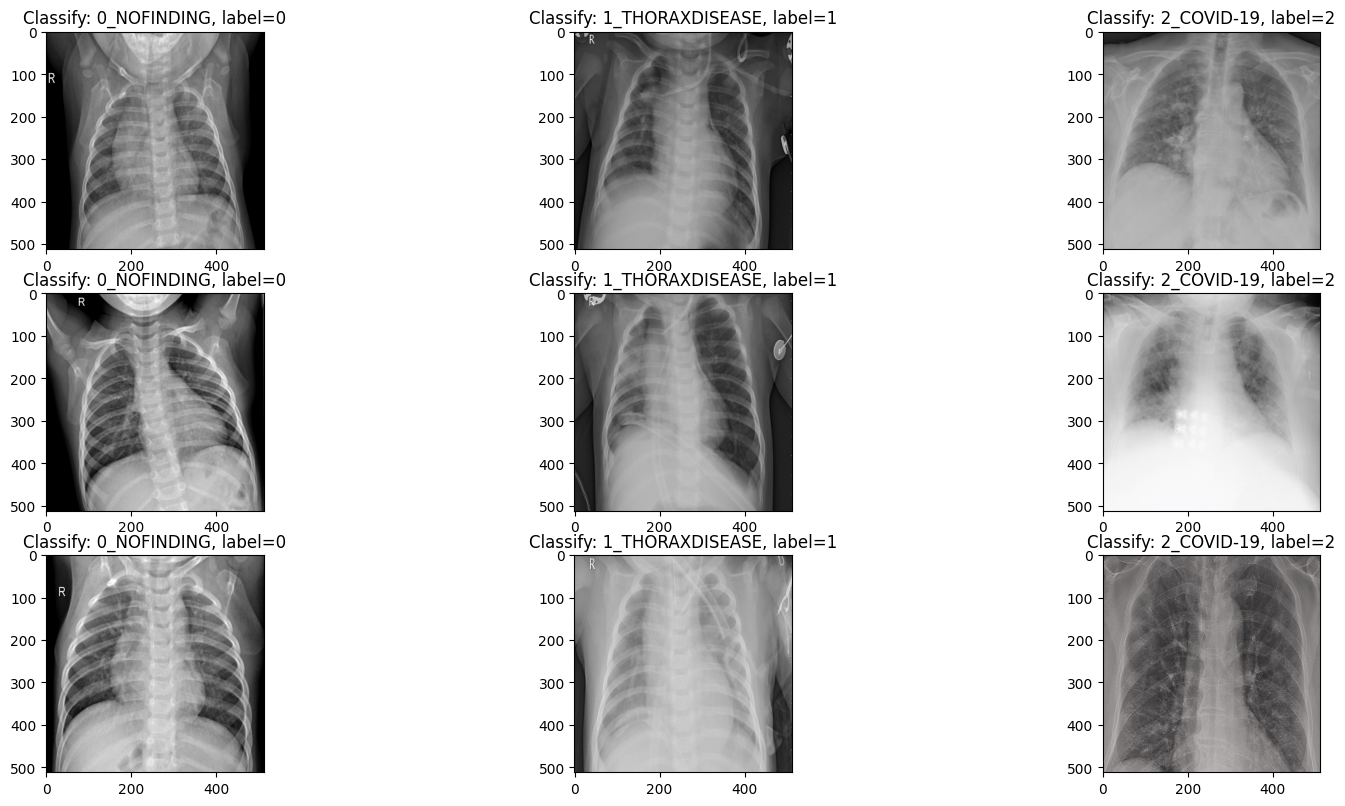

In [ ]:
#기존 img 출력
import cv2
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, figsize = (16, 8))
ax = ax.ravel()
plt.tight_layout()

# 이미지 파일 출력
for i, file_name in enumerate(['0_NOFINDING', '1_THORAXDISEASE', '2_COVID-19']):
    
    set_path = input_path + file_name
    
    for j in range(0,3):
      
       img = cv2.imread(set_path+'/'+os.listdir(set_path)[0+j])
       img = cv2.resize(img, (512,512))
                        
       ax[i+j*3].imshow(img)
       ax[i+j*3].set_title('Classify: {}, label={}'.format(file_name,i))

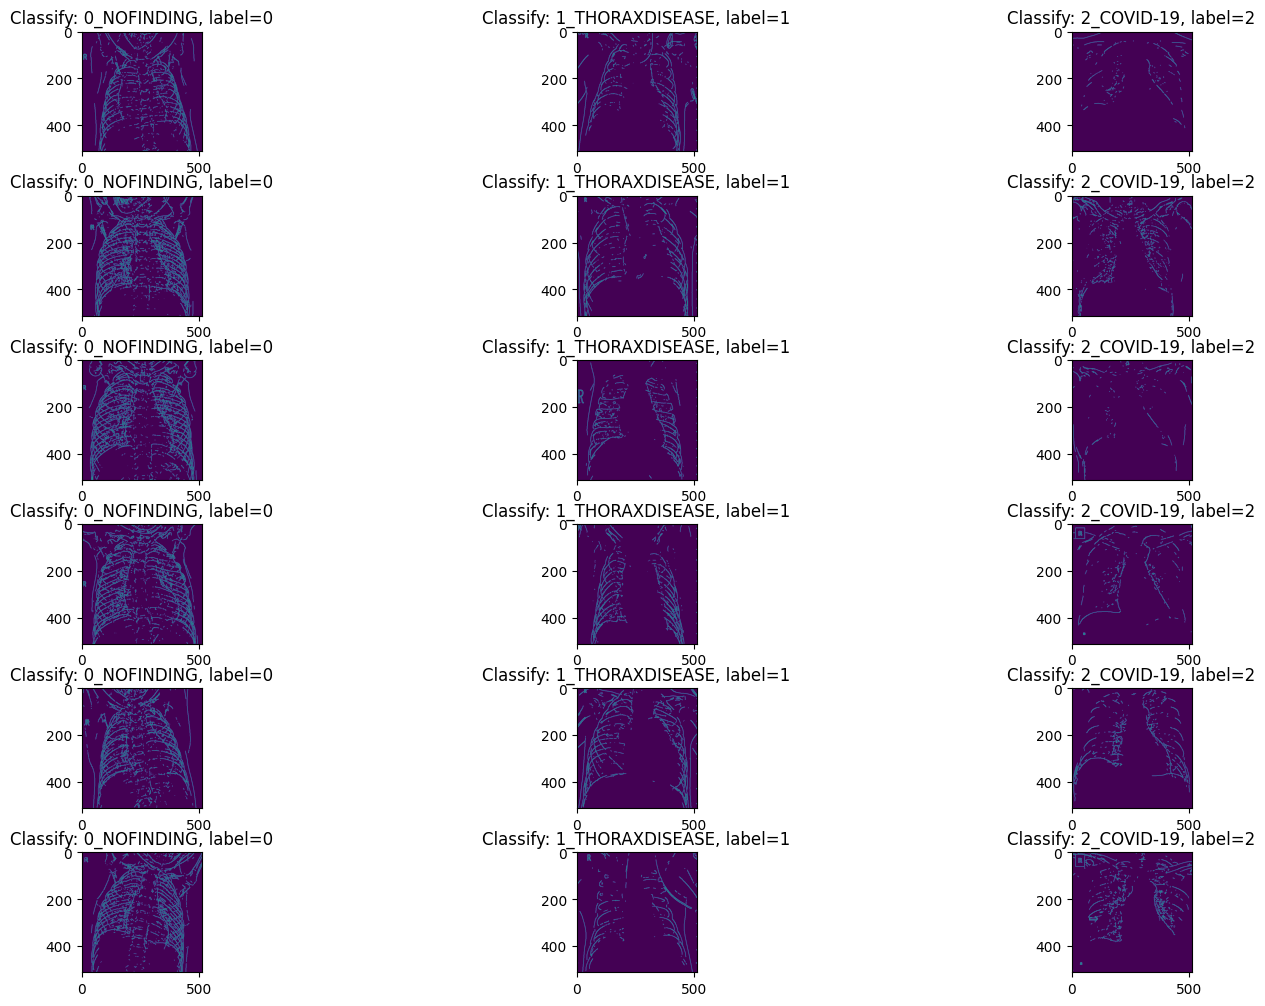

In [ ]:
#뼈 사진

fig, ax = plt.subplots(6,3, figsize = (15,10))
ax = ax.ravel()
plt.tight_layout()

# 이미지 파일 출력
for i, file_name in enumerate(['0_NOFINDING', '1_THORAXDISEASE', '2_COVID-19']):
    
    set_path = input_path + file_name
    
    for j in range(0,6):

#       ax[i+j*3].imshow(plt.imread(set_path+'/'+os.listdir(set_path)[0+j]), cmap='gray')
 #      ax[i+j*3].set_title('Classify: {}, label={}'.format(file_name,i))

       img = cv2.imread(set_path+'/'+os.listdir(set_path)[0+3*j])
       img = cv2.resize(img, (512,512))
       img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       img = cv2.Canny(img, 80, 100)                 
       ax[i+j*3].imshow(img)
       ax[i+j*3].set_title('Classify: {}, label={}'.format(file_name,i))

NOFINIDNG 에서 뼈가 많이 나타나는 경향성 보임/ 뼈 데이터가 의미가 있을 지도 모름/ 사용 안하는 걸로

Data_set Processing

In [ ]:
#데이터 처리 & 정규화 과정
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
#함수 정의
def process_data(img_dim, batch_size):
#Imagedatagenerator 함수 사용(x_ray 사진 생성시 추천 수치)
#"Numpy Array Iterator"
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range = 10,
        zoom_range = 0.33, 
        width_shift_range = 0.2,
        height_shift_range = 0.2, 
        fill_mode='nearest'
        )
                      
    train_gen = train_datagen.flow_from_directory(
        directory = input_path, 
        target_size = (img_dim, img_dim),
        batch_size = batch_size, 
        class_mode ='sparse',
        shuffle = True
        )
    
    test_datagen = ImageDataGenerator( rescale=1./255 )

    test_gen = test_datagen.flow_from_directory(
        directory = input_path, 
        target_size = (img_dim, img_dim),
        batch_size = batch_size, 
        class_mode ='sparse',
        shuffle = True
        )
    

    val_datagen = ImageDataGenerator( rescale=1./255,
        shear_range = 10,
        zoom_range = 0.33, 
        width_shift_range = 0.2,
        height_shift_range = 0.2, 
        fill_mode='nearest')
    
    val_gen = val_datagen.flow_from_directory(
        directory = input_path, 
        target_size = (img_dim, img_dim),
        batch_size = batch_size, 
        class_mode ='sparse', 
        shuffle = True
        )
    

    return train_gen, test_gen, val_gen


Train과 Val의 비율이 1:1이면 더 좋지 않나?/ 이미지 증폭 비율 맞춰주면 더 좋은 듯 하다(검증 완)/ Train과 Val 차원이 별개로 있다면 Data 비율을 맞춰서 1대1 대응?무차원화? 하는 느낌

 + 이미지를 시스템 RAM이 받춰주는 최대한 증폭해서 다양한 경우의 수에 과적합시키면 불확실성이 준다

In [ ]:
import numpy as np
img_dims = 512
batch_size = 100


#Agumentation// data
(train_gen, test_gen, val_gen) = process_data(img_dims, batch_size)


train_set, train_label = train_gen.next()
val_set, val_label = val_gen.next()
test_set, test_label = test_gen.next()

for i in range(6):
  train_set_1, train_label_1 = train_gen.next()

  train_set = np.concatenate((train_set, train_set_1))
  train_label = np.concatenate((train_label, train_label_1))

for i in range(1):
  val_set_1, val_label_1 = val_gen.next()

  val_set = np.concatenate((val_set, val_set_1))
  val_label = np.concatenate((val_label, val_label_1))


test_set_1, test_label_1 = test_gen.next()

test_set = np.concatenate((test_set, test_set_1))
test_label = np.concatenate((test_label, test_label_1))


Found 5507 images belonging to 3 classes.
Found 5507 images belonging to 3 classes.
Found 5507 images belonging to 3 classes.


In [ ]:
del model

In [ ]:
ver 2

Trial 10

3 classify는 units가 크면 값이 튐/왜 그런지 모름/ 아마 RasNet 망 개수가 충분해서 많이 안해도 도는 듯함./ 그래서 100이내 최소공약수가 가장 많은 수로 선정해 시도

steps_per_epoch 도 1000 이내 최소공약수가 가장 많은 840으로 선정

In [ ]:
# Xception < ResNet50 < EfficientNetV2L < ResNet152

In [ ]:
# Adam(무난) vs Adagrad(정확도는 좋은데 속도 너무 느려짐)

EarlyStopping추가/ ReduceLROnPlateau 추가/ regularizers L1 추가/ ModelCheckpoint 추가/ 

EfficientNetB7

In [ ]:
from keras.applications.resnet import ResNet152
from PIL import Image
from keras.models import Sequential,Model
from keras.layers import  Input, GlobalAveragePooling2D, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.regularizers import l1
 

def create_model(verbose=False):
    input_tensor = Input(shape=(img_dims, img_dims, 3))
    pretrained_model = ResNet152(input_tensor = input_tensor, include_top = False, weights='imagenet')
    pretrained_output = pretrained_model.output
    
    # customize Classifier layer
    x = GlobalAveragePooling2D()(pretrained_output)
    x = Dense(units = 128 , activation='relu',kernel_regularizer=l1(0.001))(x)
    x = Dropout(0.75)(x)
    # 이진 분류이므로 활성함수를 sigmoid로 변경
    output = Dense(units = 3, activation='softmax')(x)
    

    model = Model(inputs=input_tensor, outputs=output)
    if verbose:
        model.summary()
    return model


reduceLR = ReduceLROnPlateau(monitor='val_loss', 
                             factor = 0.5,
                             patience= 8,         
)

early_stopping = EarlyStopping(patience = 35, restore_best_weights=True)

model = create_model(verbose=False)
# 모델 compile
model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# 모델 학습

checkpoint_path = "model_checkpoint.h5"

checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

train_hist = model.fit(train_set,train_label, steps_per_epoch = 200  , epochs = 500, 
                       validation_steps = batch_size, validation_data = (test_set,test_label), callbacks=[early_stopping,reduceLR ,checkpoint])

234698864/234698864 [==============================] - 1s 0us/step
Epoch 1/500
200/200 [==============================] - ETA: 0s - loss: 6.8960 - accuracy: 0.7437
Epoch 1: val_accuracy improved from -inf to 0.71500, saving model to model_checkpoint.h5
200/200 [==============================] - 74s 244ms/step - loss: 6.8960 - accuracy: 0.7437 - val_loss: 6.8545 - val_accuracy: 0.7150 - lr: 1.0000e-04
Epoch 2/500
200/200 [==============================] - ETA: 0s - loss: 5.8102 - accuracy: 0.8000
Epoch 2: val_accuracy did not improve from 0.71500
200/200 [==============================] - 27s 137ms/step - loss: 5.8102 - accuracy: 0.8000 - val_loss: 6.4804 - val_accuracy: 0.0600 - lr: 1.0000e-04
Epoch 3/500
200/200 [==============================] - ETA: 0s - loss: 5.0408 - accuracy: 0.8400
Epoch 3: val_accuracy did not improve from 0.71500
200/200 [==============================] - 27s 136ms/step - loss: 5.0408 - accuracy: 0.8400 - val_loss: 5.5083 - val_accuracy: 0.0650 - lr: 1.0000e-0

In [ ]:
test_hist = model.evaluate(test_set, test_label)

7/7 [==============================] - 4s 169ms/step - loss: 0.2540 - accuracy: 0.9400


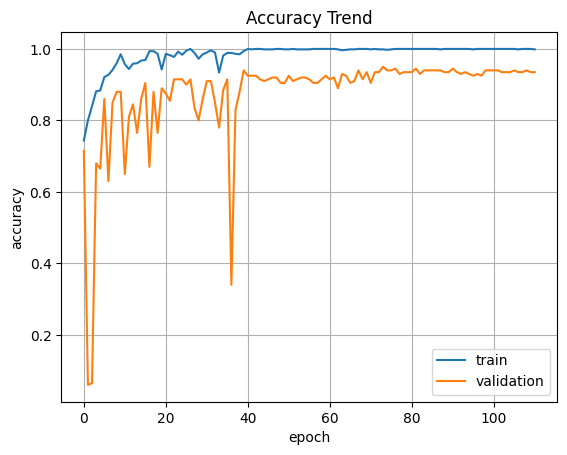

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_hist.history['accuracy'])
plt.plot(train_hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

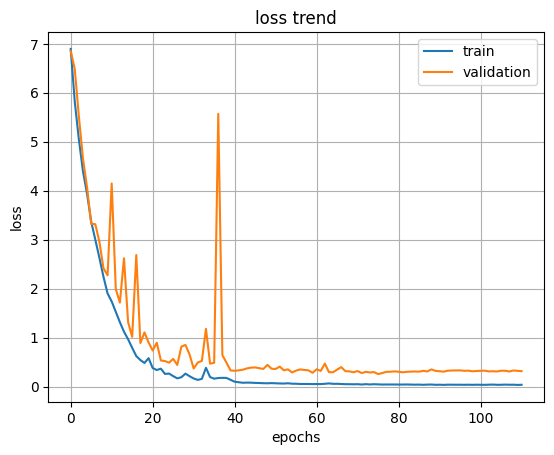

In [ ]:
plt.title('loss trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(train_hist.history['loss'], label='train')
plt.plot(train_hist.history['val_loss'], label='validation')
plt.legend(loc='best')
plt.show()

In [ ]:
'''from keras.models import save_model, load_model

save_model(model, 'EfficientNetV2L_ver2') '''

In [ ]:
predict_datagen = ImageDataGenerator(rescale=1.0/255.0)
predict_generator = predict_datagen.flow_from_directory('VALIDATE', target_size=(512, 512),
                                                        batch_size=1, class_mode= None, shuffle=False)

# 예측 수행
predicted_vals = model.predict(predict_generator, steps=len(predict_generator))

label_pred_bool = np.argmax(predicted_vals, axis=1)
print((predicted_vals, label_pred_bool))

Found 1130 images belonging to 1 classes.
 182/1130 [===>..........................] - ETA: 2:28

In [ ]:
submission_df = pd.read_csv('DLA_Phase3_Sample.csv') 

file_names = predict_generator.filenames

for i, file_name in enumerate(file_names):
    file_id = file_name.split('/')[1] 
    class_id = int(np.argmax(predicted_vals[i])) 
    submission_df.loc[submission_df['ID'] == file_id, 'Code'] = class_id 

# submission 파일 저장
submission_df.to_csv('ResNet152L_5.21_16시.csv', index=False)

In [ ]:
from google.colab import notebook
notebook.autonotebookmode()
notebook.TimeoutException.timeout(60)  # 타임아웃 시간 설정 (예: 600초 = 10분)

ImportError: ignored